- 당뇨 유무 비율 맞추기

In [1]:
import numpy as np
import pandas as pd
#from preprocess1121 import preproc, get_X, g_testX, get_y
import torch
from torch.autograd import Variable
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# train = pd.read_csv('./data/train.csv', index_col=0)
# validation = pd.read_csv('./data/validation.csv', index_col=0)
# test = pd.read_csv('./data/test.csv', index_col=0)

origin_df = pd.read_csv('./data/origin_df.csv', index_col=0)

In [6]:
origin_0 = origin_df.loc[origin_df['D'] == 0].head(41767)
origin_1 = origin_df.loc[origin_df['D'] == 1]
origin_df = pd.concat([origin_0, origin_1])
origin_df['D'].value_counts()

D
0    41767
1    41767
Name: count, dtype: int64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90000 entries, 102059 to 565864
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BLDS               89997 non-null  float64
 1   HCHK_YEAR          90000 non-null  int64  
 2   IDV_ID             90000 non-null  int64  
 3   SIDO               90000 non-null  int64  
 4   SEX                90000 non-null  int64  
 5   AGE_GROUP          90000 non-null  int64  
 6   HEIGHT             90000 non-null  int64  
 7   WEIGHT             90000 non-null  int64  
 8   WAIST              89995 non-null  float64
 9   SIGHT_LEFT         89984 non-null  float64
 10  SIGHT_RIGHT        89986 non-null  float64
 11  HEAR_LEFT          89982 non-null  float64
 12  HEAR_RIGHT         89982 non-null  float64
 13  BP_HIGH            89999 non-null  float64
 14  BP_LWST            89999 non-null  float64
 15  TOT_CHOLE          39209 non-null  float64
 16  TRIGLYCERIDE       39

In [19]:
origin_df['BMI'] = origin_df['WEIGHT'] / ((origin_df['HEIGHT'])/100)**2

In [20]:
origin_df.insert(0, 'BLDS', origin_df.pop('BLDS'))

In [21]:
origin_df = origin_df.drop(['BP_HIGH'], axis=1)

In [22]:
origin_df = origin_df.drop(['TOT_CHOLE'], axis=1)

In [23]:
origin_df = origin_df.drop(columns=['HCHK_YEAR', 'IDV_ID','SIDO','HEIGHT','WEIGHT','WAIST','SIGHT_LEFT','SIGHT_RIGHT','HEAR_LEFT','HEAR_RIGHT','SGOT_AST','DRK_YN'])

origin_df = origin_df.drop(columns=['TTR_YN', 'WSDM_DIS_YN','ODT_TRB_YN','TTH_MSS_YN','CRS_YN', 'HCHK_OE_INSPEC_YN'])#치아 관련

In [24]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83534 entries, 643124 to 913585
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BLDS              83534 non-null  float64
 1   SEX               83534 non-null  int64  
 2   AGE_GROUP         83534 non-null  int64  
 3   BP_LWST           83533 non-null  float64
 4   TRIGLYCERIDE      83534 non-null  float64
 5   HDL_CHOLE         83534 non-null  float64
 6   LDL_CHOLE         83534 non-null  float64
 7   HMG               83534 non-null  float64
 8   OLIG_PROTE_CD     83534 non-null  float64
 9   CREATININE        83534 non-null  float64
 10  SGPT_ALT          83534 non-null  float64
 11  GAMMA_GTP         83534 non-null  float64
 12  SMK_STAT_TYPE_CD  83497 non-null  float64
 13  D                 83534 non-null  int64  
 14  BMI               83534 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 12.2 MB


In [25]:
orgin_df = origin_df.sample(frac=1).reset_index(drop=True)

In [26]:
test_df = origin_df.tail(10000)
val_df = origin_df.head(73534).tail(10000)
origin_df = origin_df.head(63534)

In [27]:
print(origin_df.tail())
print(val_df.head())

         BLDS  SEX  AGE_GROUP  BP_LWST  TRIGLYCERIDE  HDL_CHOLE  LDL_CHOLE  \
906784  160.0    2         10     88.0         249.0       47.0       98.0   
708165  477.0    1         11     80.0         307.0       57.0      129.0   
967137  132.0    1         11     68.0         286.0       34.0       51.0   
918620  146.0    1         12     82.0         141.0       45.0       99.0   
797034  132.0    1         13     83.0          86.0       51.0      146.0   

         HMG  OLIG_PROTE_CD  CREATININE  SGPT_ALT  GAMMA_GTP  \
906784  14.0            1.0         0.0      34.0       81.0   
708165  17.0            1.0         1.0      20.0       71.0   
967137  15.0            1.0         0.0      52.0      153.0   
918620  14.0            1.0         1.0      37.0       22.0   
797034  16.0            1.0         0.0      24.0       51.0   

        SMK_STAT_TYPE_CD  D        BMI  
906784               1.0  1  37.460978  
708165               1.0  1  26.122449  
967137               3.

In [30]:
print(test_df.isnull().sum())
print(val_df.isnull().sum())
print(origin_df.isnull().sum())


BLDS                0
SEX                 0
AGE_GROUP           0
BP_LWST             0
TRIGLYCERIDE        0
HDL_CHOLE           0
LDL_CHOLE           0
HMG                 0
OLIG_PROTE_CD       0
CREATININE          0
SGPT_ALT            0
GAMMA_GTP           0
SMK_STAT_TYPE_CD    4
D                   0
BMI                 0
dtype: int64
BLDS                0
SEX                 0
AGE_GROUP           0
BP_LWST             0
TRIGLYCERIDE        0
HDL_CHOLE           0
LDL_CHOLE           0
HMG                 0
OLIG_PROTE_CD       0
CREATININE          0
SGPT_ALT            0
GAMMA_GTP           0
SMK_STAT_TYPE_CD    5
D                   0
BMI                 0
dtype: int64
BLDS                 0
SEX                  0
AGE_GROUP            0
BP_LWST              1
TRIGLYCERIDE         0
HDL_CHOLE            0
LDL_CHOLE            0
HMG                  0
OLIG_PROTE_CD        0
CREATININE           0
SGPT_ALT             0
GAMMA_GTP            0
SMK_STAT_TYPE_CD    28
D              

In [31]:
origin_df = origin_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

In [32]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63505 entries, 643124 to 797034
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BLDS              63505 non-null  float64
 1   SEX               63505 non-null  int64  
 2   AGE_GROUP         63505 non-null  int64  
 3   BP_LWST           63505 non-null  float64
 4   TRIGLYCERIDE      63505 non-null  float64
 5   HDL_CHOLE         63505 non-null  float64
 6   LDL_CHOLE         63505 non-null  float64
 7   HMG               63505 non-null  float64
 8   OLIG_PROTE_CD     63505 non-null  float64
 9   CREATININE        63505 non-null  float64
 10  SGPT_ALT          63505 non-null  float64
 11  GAMMA_GTP         63505 non-null  float64
 12  SMK_STAT_TYPE_CD  63505 non-null  float64
 13  D                 63505 non-null  int64  
 14  BMI               63505 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 7.8 MB


<Axes: >

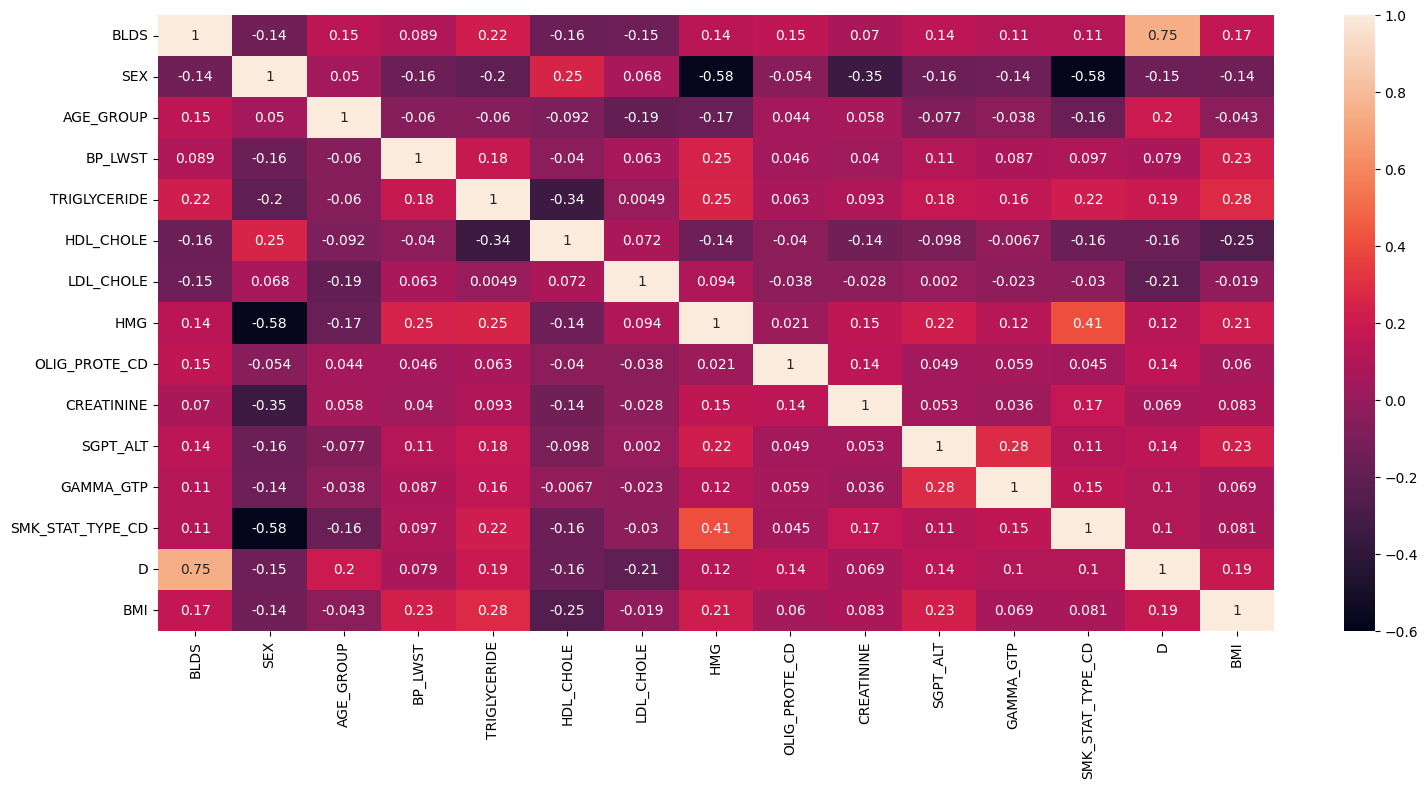

In [33]:
#sns.heatmap(train[['WEIGHT', 'BLDS']].corr())
#plt.scatter(train['WEIGHT'], train['BLDS'], s=3)
#plt.show()
plt.figure(figsize=(18,8))
corr = origin_df.corr()
#print(corr)
sns.heatmap(corr, annot=True, square=False, vmin=-0.6, vmax=1.0)

In [34]:
origin_df.to_csv('./data/train_df.csv')
val_df.to_csv('./data/validation_df.csv')
test_df.to_csv('./data/test_df.csv')